In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print('X_train shape::: ',X_train.shape)
print('X_test shape::: ',X_test.shape)
print('y_train shape::: ',y_train.shape)
print('y_test shape::: ',y_test.shape)

X_train shape:::  (50000, 32, 32, 3)
X_test shape:::  (10000, 32, 32, 3)
y_train shape:::  (50000, 1)
y_test shape:::  (10000, 1)


In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_test2 = y_test

In [10]:
def disp_img(X,y):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
    fig,ax = plt.subplots(5,5,sharey=False, tight_layout=True, figsize=(17,17), facecolor='white')
    n=0
    for i in range(0,5):
        for j in range(0,5):
            ax[i,j].matshow(X[n+7])
            index = int(y[n+7])
            ax[i,j].set_title(labels[index],fontsize=8)
            n=n+1
    plt.show()

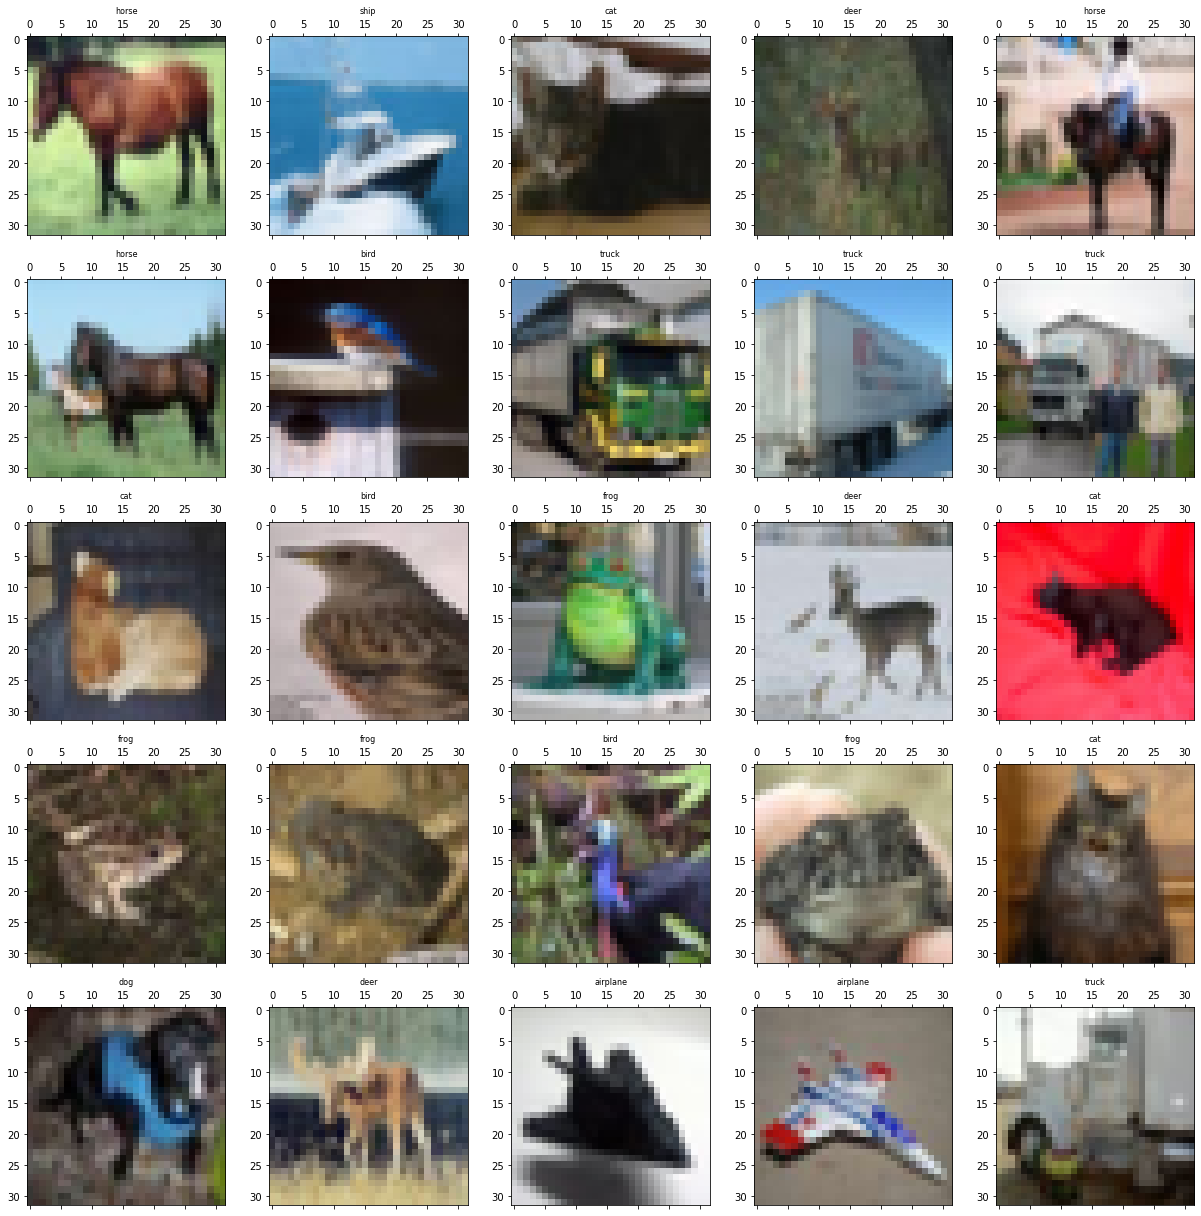

In [11]:
disp_img(X_train,y_train)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train.shape

(50000, 10)

# CNN Model

In [28]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
    return model

In [29]:
model_cnn = cnn_model()

In [30]:
history_cnn = model_cnn.fit(X_train,y_train,epochs=10,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
1250/1250 [==============================] - 71s 56ms/step - loss: 1.3986 - accuracy: 0.5027 - val_loss: 1.5841 - val_accuracy: 0.4483
Epoch 2/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.0369 - accuracy: 0.6377 - val_loss: 1.2327 - val_accuracy: 0.5808
Epoch 3/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.8943 - accuracy: 0.6874 - val_loss: 1.0405 - val_accuracy: 0.6325
Epoch 4/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.8029 - accuracy: 0.7200 - val_loss: 0.9772 - val_accuracy: 0.6689
Epoch 5/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.7251 - accuracy: 0.7480 - val_loss: 0.9942 - val_accuracy: 0.6664
Epoch 6/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.6657 - accuracy: 0.7689 - val_loss: 0.9132 - val_accuracy: 0.6886
Epoch 7/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.6058 - accuracy: 0.7878 - val_loss: 0.8536 -

In [31]:
y_pred = np.argmax(model_cnn.predict(X_test),axis=1)

In [32]:
def evaluation(model):
    loss,accuracy = model.evaluate(X_test,y_test)
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))
    

In [33]:
evaluation(model_cnn)

313/313 [==============================] - 5s 15ms/step - loss: 0.9523 - accuracy: 0.7026
loss =  0.9523
accuracy =  70.26


In [34]:
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1000
           1       0.85      0.84      0.85      1000
           2       0.76      0.46      0.57      1000
           3       0.49      0.50      0.49      1000
           4       0.69      0.67      0.68      1000
           5       0.45      0.82      0.58      1000
           6       0.75      0.81      0.78      1000
           7       0.85      0.68      0.75      1000
           8       0.86      0.80      0.83      1000
           9       0.82      0.78      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.71     10000
weighted avg       0.73      0.70      0.71     10000



In [35]:
def predict_image(index):
    plt.matshow(X_test[index])
    y_ind = int(y_test2[index])
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    plt.title(labels[y_ind])
    y_ind2 = int(y_pred[index])
    print('predicted item name ::: ',labels[y_ind2])

predicted item name :::  frog


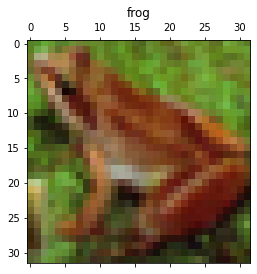

In [36]:
predict_image(29)

predicted item name :::  ship


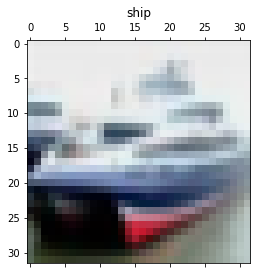

In [41]:
predict_image(1)